In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

0. simulate dataset with outliers

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # target values

# Use only setosa (class 0) as "normal data"
X_setosa = X[y == 0]

# Add a few virginica (class 2) as "outliers"
X_virginica = X[y == 2]
np.random.seed(42)
outlier_samples = X_virginica[np.random.choice(len(X_virginica), size=5, replace=False)]

# Record indices of true outliers
true_outlier_indices = np.arange(len(X_setosa), len(X_setosa) + len(outlier_samples))
print(true_outlier_indices)

# Final dataset: normal data (setosa) + outliers (some virginica)
X_final = np.vstack([X_setosa, outlier_samples])
print("Dataset size:", X_final.shape)

[50 51 52 53 54]
Dataset size: (55, 4)


1. KNN outlier score

In [3]:

# X is not include x
def calculate_distance(x,X):
    return np.sqrt(np.sum(np.power(x-X,2),axis=1))

def calculate_score(distances):
    return np.mean(distances)
    
def knn_outlier_score(X, k):
    # TODO: Compute average distance to k nearest neighbors for each sample.
    scores = []
    for i in range(len(X)):
        x_base = X[i]
        # filter x_base out of X
        X_filter = np.delete(X,i,axis=0)
        distances = calculate_distance(x_base,X_filter)
        # find k 
        distances.sort()
        distances_k_filtered = distances[:k]
        score = calculate_score(distances_k_filtered)
        scores.append(score)
    return scores

2. KNN outlier detection

In [4]:
def detect_outliers(X, k, T):
    # TODO: find index of outliers
    outlier_scores = knn_outlier_score(X,k)
    outliers = []
    for i in range(len(X)):
        if outlier_scores[i] > T:
            outliers.append(i)
    return np.array(outliers)

3. Experiment and Visualization

Detected outliers (indices): [50 51 52 53 54]
True outliers (indices): [50 51 52 53 54]


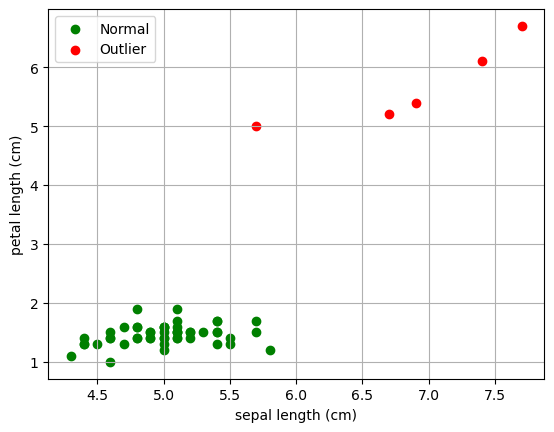

In [5]:
# TODO: set k and threshold T
k = 7
T = 1

scores = knn_outlier_score(X_final, k)
outliers = detect_outliers(X_final, k, T)
print("Detected outliers (indices):", outliers)
print("True outliers (indices):", true_outlier_indices)

# TODO: visualize detection results using scatter plot
# red for outliers, green for normal data
# choose any two feasures for visualization
feature1_index = 0
feature3_index = 2
X_normal = np.delete(X_final,outliers,axis=0)
X_outlier = X_final[outliers]

plt.figure()
plt.scatter(X_normal[:, feature1_index], X_normal[:, feature3_index], color='green', label='Normal')
plt.scatter(X_outlier[:, feature1_index], X_outlier[:, feature3_index], color='red', label='Outlier')
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature3_index])
plt.legend()
plt.grid(True)


4. Evaluation: TPR & FPR

In [6]:
# TODO: calculate TPR and FPR
correct_outlier_indices = []
wrong_outlier_indices = []
for outlier in outliers:
    if outlier in true_outlier_indices:
        correct_outlier_indices.append(outlier)
    else:
        wrong_outlier_indices.append(outlier)
TP = len(correct_outlier_indices)
FP = len(wrong_outlier_indices)

print(f"True Outliers Detected rate: {TP} / {len(true_outlier_indices)}")
print(f"False Positives rate: {FP} / {len(X_setosa)}")

True Outliers Detected rate: 5 / 5
False Positives rate: 0 / 50


5. Histogram of Outlier Scores

Text(0, 0.5, 'frequency')

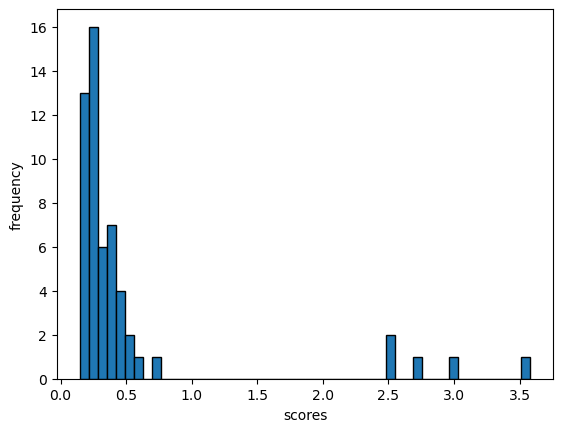

In [7]:
# TODO: plot histogram of outlier scores to find proper threshold T 
# You can set a large num of bins (e.g., 50) for higher resolution
plt.hist(scores,bins=50,edgecolor='black')
plt.xlabel(f"scores")
plt.ylabel("frequency")

# TODO:
# Based on the histogram, what is a better choice for T?
# Anlyze the effects of hyper-parameters, k and T, on detection performance.
### T
- T is small: detect more outlier but have a change to misclassifying normal data as outliers
- T is large: may miss true outliers
### k
- K is small: may miss outlier if it not far from normal data
- K is large: may include many normal data make it harder to detect outlier